In [2]:
import pingouin as pg
import pandas as pd
import numpy as np
import pyreadstat
from scipy import stats
import matplotlib.pyplot as plt

df, meta = pyreadstat.read_sav('Student.sav')
# Basic description
desc = df.describe()
# Calculate additional statistics
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]  # .mode() returns a DataFrame, use the first row
std_dev = df.std()
variance = df.var()
data_range = df.max() - df.min()
skewness = df.skew()
kurtosis = df.kurtosis()
# Add additional statistics to the description
desc.loc['mean'] = mean
desc.loc['median'] = median
desc.loc['mode'] = mode
desc.loc['std_dev'] = std_dev
desc.loc['variance'] = variance
desc.loc['range'] = data_range
desc.loc['skewness'] = skewness
desc.loc['kurtosis'] = kurtosis
# Display the enhanced description
print(desc)


             Gender    Program  YearLevel  Question01  Question02  Question03  \
count     30.000000  30.000000  30.000000   30.000000   30.000000   30.000000   
mean       1.500000   1.600000   2.333333    2.900000    2.833333    3.666667   
std        0.508548   0.498273   0.802296    1.322224    1.620629    1.470007   
min        1.000000   1.000000   1.000000    1.000000    1.000000    1.000000   
25%        1.000000   1.000000   2.000000    2.000000    1.000000    2.250000   
50%        1.500000   2.000000   3.000000    3.000000    2.500000    4.000000   
75%        2.000000   2.000000   3.000000    4.000000    4.750000    5.000000   
max        2.000000   2.000000   3.000000    5.000000    5.000000    5.000000   
median     1.500000   2.000000   3.000000    3.000000    2.500000    4.000000   
mode       1.000000   2.000000   3.000000    3.000000    1.000000    5.000000   
std_dev    0.508548   0.498273   0.802296    1.322224    1.620629    1.470007   
variance   0.258621   0.2482

Pearson Correlation Coefficient: -0.0881
P-value: 0.6432
The correlation is not statistically significant (p >= 0.05).


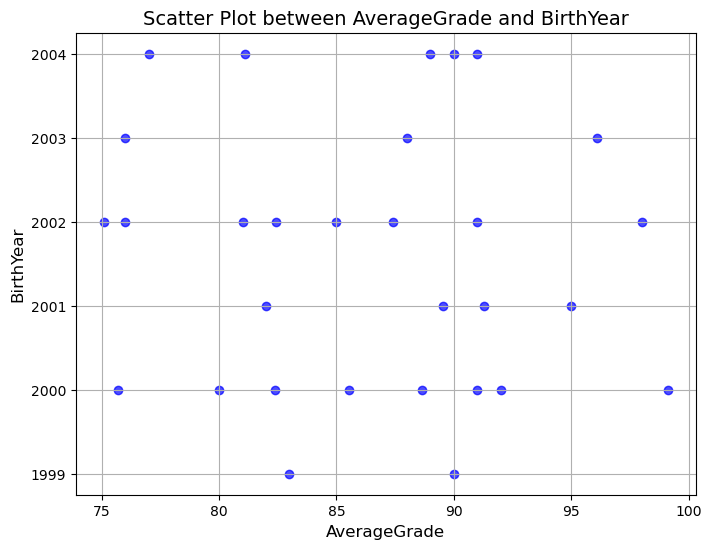

In [3]:
correlation, p_value = stats.pearsonr(df['AverageGrade'], df['BirthYear'])

# Display the Pearson Correlation Coefficient and P-value
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the correlation is statistically significant (p < 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Plotting the scatter plot (scattergram)
plt.figure(figsize=(8, 6))  # Size of the plot
plt.scatter(df['AverageGrade'], df['BirthYear'], color='blue', alpha=0.7)  # Scatter plot

# Adding labels and title to the scatter plot
plt.title('Scatter Plot between AverageGrade and BirthYear', fontsize=14)
plt.xlabel('AverageGrade', fontsize=12)
plt.ylabel('BirthYear', fontsize=12)

# Displaying the grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

In [4]:
# Convert 'Program' to categorical (if not already) and then to numeric
df['Program'] = df['Program'].astype('category')
df['Program'] = df['Program'].cat.codes  # Converts categorical to numeric codes

# Ensure that 'AverageGrade' and 'BirthDay' are numeric
df['AverageGrade'] = pd.to_numeric(df['AverageGrade'], errors='coerce')
df['BirthDay'] = pd.to_numeric(df['BirthDay'], errors='coerce')

# Drop rows with missing values (if any)
df_clean = df.dropna(subset=['AverageGrade', 'BirthDay', 'Program'])

# Perform Partial Correlation: AverageGrade vs. BirthDay, controlling for Program
partial_corr_result = pg.partial_corr(data=df_clean, x='AverageGrade', y='BirthDay', covar='Program')

# Display the result
print(partial_corr_result)

          n         r          CI95%     p-val
pearson  30  0.213942  [-0.17, 0.54]  0.265109
